In [34]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist
from keras.datasets import cifar10

In [35]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_val,y_val = X_train[40000:50000,:],y_train[40000:50000]
X_train,y_train = X_train[:40000,:],y_train[:40000]
print(X_train.shape)

(40000, 32, 32, 3)


In [36]:
# Reshape lai du lieu cho dung kich thuoc ma keras yeu cau
X_train = X_train.astype("float32")
X_val = X_val.astype("float32")
X_test = X_test.astype("float32")
X_train/=255.0
X_val/=255.0
X_test/=255.0

# One hot encoding label (Y)
Y_train = np_utils.to_categorical(y_train, 10)
Y_val = np_utils.to_categorical(y_val, 10)
Y_test = np_utils.to_categorical(y_test, 10)
print("Du lieu y ban dau:",y_train[0])
print("Du lieu y sau one-hot encoding:",Y_train[0])

Du lieu y ban dau: [6]
Du lieu y sau one-hot encoding: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [37]:
# Dinh nghia model
model = Sequential()

# Them Convolutional layer voi 32 kernel, kich thuoc 3*3
# dung ham signmoid lam activation va chi ro input_shape cho layer dau tien
model.add(Conv2D(32,(3,3), activation="sigmoid", input_shape=(32,32,3)))

# Them Convolutional layer
model.add(Conv2D(32, (3,3), activation ="sigmoid"))

# Them max pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

# Flatten chuyen tu tensor sang vector
model.add(Flatten())

# Them Fully Connected layer voi 128 nodes va dung ham sigmoid
model.add(Dense(128, activation = "sigmoid"))

# Ouput layer voi 10 node va dung softmax function de chuyen sang xac suat
model.add(Dense(10, activation="softmax"))

# Compile model, chi ro ham loss_func nao duoc su dung, phuong thuc
# dung de toi uu ham loss_func
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [38]:
# Thuc hien train model voi data
H = model.fit(X_train, Y_train, validation_data=(X_val,Y_val),batch_size=32,epochs=10,verbose="auto")

Epoch 1/10
1250/1250 [==============================] - 50s 40ms/step - loss: 2.0632 - accuracy: 0.2428 - val_loss: 1.8554 - val_accuracy: 0.3277
Epoch 2/10
1250/1250 [==============================] - 47s 37ms/step - loss: 1.7259 - accuracy: 0.3817 - val_loss: 1.6803 - val_accuracy: 0.4031
Epoch 3/10
1250/1250 [==============================] - 48s 38ms/step - loss: 1.5864 - accuracy: 0.4331 - val_loss: 1.5760 - val_accuracy: 0.4310
Epoch 4/10
1250/1250 [==============================] - 51s 41ms/step - loss: 1.5078 - accuracy: 0.4591 - val_loss: 1.5108 - val_accuracy: 0.4613
Epoch 5/10
1250/1250 [==============================] - 56s 45ms/step - loss: 1.4392 - accuracy: 0.4904 - val_loss: 1.4847 - val_accuracy: 0.4706
Epoch 6/10
1250/1250 [==============================] - 60s 48ms/step - loss: 1.3820 - accuracy: 0.5120 - val_loss: 1.4356 - val_accuracy: 0.4902
Epoch 7/10
1250/1250 [==============================] - 58s 46ms/step - loss: 1.3292 - accuracy: 0.5296 - val_loss: 1.4081 -

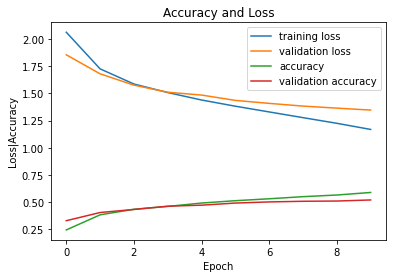

In [39]:
# Ve do thi loss, accuracy cua training set va validation set
fig = plt.figure()
numOfEpoch = 10
plt.plot(np.arange(0, numOfEpoch), H.history['loss'], label='training loss')
plt.plot(np.arange(0, numOfEpoch), H.history['val_loss'], label='validation loss')
plt.plot(np.arange(0, numOfEpoch), H.history['accuracy'], label='accuracy')
plt.plot(np.arange(0, numOfEpoch), H.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy and Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss|Accuracy')
plt.legend()

In [40]:
score = model.evaluate(X_test, Y_test,verbose=0)
print(score)

[1.3418960571289062, 0.5171999931335449]


1402
Gia tri du doan: 7


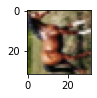

In [103]:
# Du doan anh
k = int(input())
plt.subplot(330+1)
img = X_test[k].transpose([1,0,2])
plt.imshow(img)
# pred=X_test[k].astype("float32")
# pred/=255.0
y_predict = model.predict(X_test[k].reshape(1,32,32,3))
print("Gia tri du doan:",np.argmax(y_predict))